In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Wczytanie danych

In [2]:
df = pd.read_csv('../prepared_data/wta_prepared_eda_v2.csv')
df.head()

,Tournament,Date,Surface,Round,Player_1,Player_2,Rank_1,Rank_2,Pts_1,Pts_2,...,P2_form_win,H2H_diff,elo1,elo2,surf1,surf2,blend1,blend2,Elo_diff,Elo_blend_diff
0,Mondial Australian Women's Hardcourts,2006-12-31,Hard,1st Round,Sequera M.,Ivanova E.,103.0,183.0,280.0,148.0,...,1.0,0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,0.0,0.0
1,Mondial Australian Women's Hardcourts,2006-12-31,Hard,1st Round,Ferguson S.,Sugiyama A.,184.0,26.0,146.0,716.0,...,0.5,0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,0.0,0.0
2,Mondial Australian Women's Hardcourts,2006-12-31,Hard,1st Round,Camerin M.E.,Vesnina E.,50.0,47.0,426.0,445.0,...,1.0,0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,0.0,0.0
3,Mondial Australian Women's Hardcourts,2006-12-31,Hard,1st Round,Hingis M.,Bammer S.,7.0,49.0,2018.0,430.0,...,0.5,0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,0.0,0.0
4,Mondial Australian Women's Hardcourts,2006-12-31,Hard,1st Round,Benesova I.,Bremond S.,58.0,40.0,402.0,521.0,...,1.0,0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,0.0,0.0


Accuracy na samych danych z Rank

In [16]:
accuracy1 = df[df["Rank_1"] > df["Rank_2"]]
accuracy1 = accuracy1[accuracy1["Player1_wins"] == 0]
accuracy2 = df[df["Rank_1"] < df["Rank_2"]]
accuracy2 = accuracy2[accuracy2["Player1_wins"] == 1]
full_len = len(accuracy1) + len(accuracy2)
accuracy = full_len / len(df)
accuracy

0.6514299276136228

Wybranie cech do trenowania

In [4]:
features = [
    'Rank_diff', 'Points_diff',
    'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2',
    'Round_encoded', 'H2H_diff', 'elo1', 'elo2',
]

X = df[features]
X

,Rank_diff,Points_diff,Rank_1,Rank_2,Pts_1,Pts_2,Round_encoded,H2H_diff,elo1,elo2
0,80.0,132.0,103.0,183.0,280.0,148.0,1,0,1500.000000,1500.000000
1,-158.0,-570.0,184.0,26.0,146.0,716.0,1,0,1500.000000,1500.000000
2,-3.0,-19.0,50.0,47.0,426.0,445.0,1,0,1500.000000,1500.000000
3,42.0,1588.0,7.0,49.0,2018.0,430.0,1,0,1500.000000,1500.000000
4,-18.0,-119.0,58.0,40.0,402.0,521.0,1,0,1500.000000,1500.000000
...,...,...,...,...,...,...,...,...,...,...
42368,-78.0,-3720.0,86.0,8.0,764.0,4484.0,7,0,1638.882243,2094.718569
42369,-55.0,-898.0,80.0,25.0,848.0,1746.0,8,0,1823.895971,1959.606854
42370,-71.0,-2040.0,86.0,15.0,764.0,2804.0,8,-5,1686.902236,2015.898521
42371,48.0,439.0,55.0,103.0,1105.0,666.0,8,0,1783.966847,1456.979971


Do testowania

In [5]:
y = df['Player1_wins']
y

0        1
1        1
2        0
3        1
4        0
        ..
42368    1
42369    0
42370    1
42371    1
42372    0
Name: Player1_wins, Length: 42373, dtype: int64

Skalowanie cech numerycznych

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 6.49245434e-01,  7.21768935e-02,  2.83429246e-01, ...,
         3.05854523e-03, -1.02213241e+00, -1.02142944e+00],
       [-1.25313455e+00, -2.63972202e-01,  1.14458235e+00, ...,
         3.05854523e-03, -1.02213241e+00, -1.02142944e+00],
       [-1.41896015e-02, -1.28681153e-04, -2.80041301e-01, ...,
         3.05854523e-03, -1.02213241e+00, -1.02142944e+00],
       ...,
       [-5.57726739e-01, -9.67874154e-01,  1.02693410e-01, ...,
        -4.52840079e+00, -7.94971119e-02,  1.56469015e+00],
       [ 3.93463251e-01,  2.19182267e-01, -2.26883702e-01, ...,
         3.05854523e-03,  4.10045070e-01, -1.23708220e+00],
       [ 2.57763644e-02,  6.93717529e-01, -7.37196650e-01, ...,
         3.05854523e-03,  5.74524143e-02,  2.01972004e+00]])

Podział na zbiory train/test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Budowa modelu Keras

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid'),
    
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Krzysztof\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Trenowanie modelu

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)

Epoch 1/30
848/848 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6170 - loss: 0.6983 - val_accuracy: 0.6637 - val_loss: 0.6136
Epoch 2/30
848/848 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6399 - loss: 0.6334 - val_accuracy: 0.6670 - val_loss: 0.6093
Epoch 3/30
848/848 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6566 - loss: 0.6173 - val_accuracy: 0.6667 - val_loss: 0.6111
Epoch 4/30
848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6652 - loss: 0.6103 - val_accuracy: 0.6664 - val_loss: 0.6080
Epoch 5/30
848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6571 - loss: 0.6206 - val_accuracy: 0.6656 - val_loss: 0.6121
Epoch 6/30
848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6617 - loss: 0.6141 - val_accuracy: 0.6661 - val_loss: 0.6125
Epoch 7/30
848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6651 - loss: 0.6120 - val_accuracy: 0.6676 - val_loss: 0.6075
Epoch 8/30
848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6560 - loss: 0.6157 - val_accuracy: 0.

Ewaluacja

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6710 - loss: 0.6030
Test accuracy: 0.67


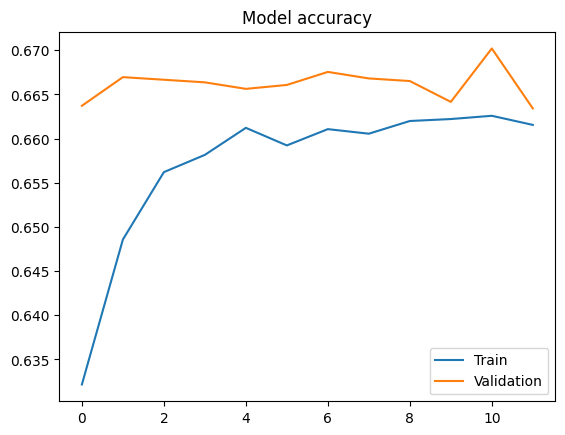

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Model accuracy")
plt.legend()
plt.show()
